## Plot Benchmark Results

In [1]:
import pandas as pd
import papermill as pm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import psutil
n_cores = psutil.cpu_count(logical=True)
n_cpus = psutil.cpu_count(logical=False)
print("cores:", n_cores)
print("cpus: ", n_cpus)

cores: 4
cpus:  2


In [3]:
r = pd.read_csv('../results/Read.csv')[['cores','read']]
f = pd.read_csv('../results/Filter.csv')[['cores','filter']]
p = pd.read_csv('../results/Fingerprint.csv')[['cores','fingerprint']]
m = pd.read_csv('../results/Flatmap.csv')[['cores','flatmap']]

In [4]:
df = m.merge(p, on='cores')
df = df.merge(f, on='cores')
df = df.merge(r, on='cores')
df

,cores,flatmap,fingerprint,filter,read
0,1,226.961150,154.365622,62.542948,61.597179
1,2,122.753293,85.638164,35.805331,34.839754
2,3,126.704003,88.336952,36.629864,35.284431
3,4,129.303737,90.052061,37.405966,36.063575


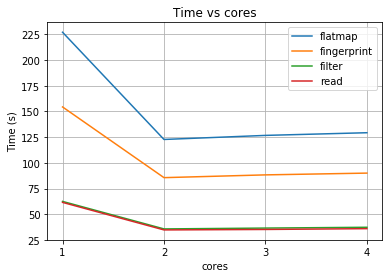

In [5]:
df.plot.line(x="cores", grid=True, title="Time vs cores")

plt.ylabel('Time (s)')
plt.xticks(np.arange(1, n_cores+1, 1))
plt.savefig('../results/Benchmark.png')
plt.show()

In [6]:
%load_ext watermark
%watermark -v -m -p matplotlib,numpy,pandas,papermill,pyspark

CPython 3.6.3
IPython 6.3.1

matplotlib 2.2.2
numpy 1.14.5
pandas 0.22.0
papermill 0.15.0
pyspark 2.3.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.0.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
